# FINAL PROJECT

# A. Thông Tin Nhóm: 

## I. Thông tin Thành Viên Nhóm :

Họ tên: Trần Hữu Hoàng

- MSSV: 18120387



Họ tên: Nguyễn Thành Ngôn

- MSSV: 1712617

## II. Phân Công:

### Trần Hữu Hoàng Mssv: 18120387

#### Khám phá dữ liệu mức cơ bản: 
- 1.2 tính số dòng số cột.
- 1.3 Kiểm tra trùng lắp dữ liệu.
- 1.4 liệt kê các kiểu dữ liệu của các cột.

#### Khám phá dữ liệu nâng cao: 
- 2.1 Liệt kê top 5 đội bóng có số trận thắng nhiều nhất tính từ 1872-2021? Và top 5 đội bóng có thành tích giao hữu trên sân nhà tốt nhất?
- 2.2 Thành tích ghi bàn của đội tuyển Brazil thay đổi như thế nào qua 10 năm gần đây?

# B. Đồ Án

## I. NGUỒN GỐC DỮ LIỆU

### 1. Sơ lược về dữ liệu:

Dữ liệu về kết quả các trận đấu bóng đá quốc tế từ năm 1872 cho đến 2021.Các trận đấu từ FIFA World Cup đến FIFI Wild Cup đến các trận giao hữu thông thường. Các trận đấu trong khuôn khổ bóng đá nam và dữ liệu không bao gồm Thế vận hội Olympic hoặc các trận đấu có ít nhất một trong các đội là đội hạng B, đội U-23 quốc gia hoặc đội tuyển của một giải đấu.


*results.csv gồm các cột: 
- date - ngày diễn ra trận đấu
- home_team - tên của đội chủ nhà
- away_team - tên của đội khách
- home_score - tỷ số toàn trận của đội chủ nhà bao gồm hiệp phụ, không bao gồm loạt sút luân lưu
- away_score - tỷ số toàn trận của đội khách bao gồm hiệp phụ, không bao gồm loạt sút luân lưu
- tournament - tên của giải đấu
- city - tên thành phố / thị trấn / đơn vị hành chính nơi trận đấu diễn ra
- country - tên quốc gia nơi trận đấu diễn ra
- neutral - Cột TRUE / FALSE cho biết trận đấu có được diễn ra tại một địa điểm trung lập hay không


Dữ liệu được public trên 

https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017?select=results.csv

### 2. Thu thập dữ liệu


Dữ liệu được thu thập từ một số nguồn  như là Wikipedia, rsssf.com và các trang web của các hiệp hội bóng đá cá nhân.

## II. KHám Phá Dữ Liệu

### 1. Khám phá dữ liệu mức cơ bản:


Iport các thư viện cần thiết.

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 1.1 đọc dữ liệu từ file result.csv


In [182]:
fb_df = pd.read_csv('results.csv') 
fb_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


#### 1.2 số dòng và cột của dữ liệu

In [183]:
num_rows, num_cols = fb_df.shape
print('num_rows: ')
print(num_rows)
print('num_cols: ')
print(num_cols)

num_rows: 
42405
num_cols: 
9


#### 1.3 kiểm tra các dòng dữ liệu có bị trùng lắp hay không


In [184]:
have_duplicated_rows = any(fb_df.duplicated())
have_duplicated_rows

False

#### 1.4 liệt kê kiểu dữ liệu của các cột:

In [185]:
col_dtypes = fb_df.dtypes
col_dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral        object
dtype: object

- chuyển dữ liệu cột date về dạng datetime

In [186]:
fb_df['date'] = pd.to_datetime(fb_df['date'])
fb_df['date'].dt.year.min()

1872

## 2. Xử lý dữ liệu nâng cao


### 2.1 Liệt kê top 5 đội bóng có số trận thắng nhiều nhất tính từ 1872-2021? Và top 5 đội bóng có thành tích giao hữu trên sân nhà tốt nhất?


### Tiền xử Lý

#### Để trả lời cho 2 câu hỏi trên chúng ta cần thêm cột dữ liệu  win_team:
- cột win_team chưa thông tin về tên đội tuyển giành thắng lợi. Nếu kết quả thi đấu là hòa nhau thì cột win_team chứa giá trị là NaN.

##### Thêm vào cột chứa tên đội tuyển giành chiến thắng:
- Đầu tiên chúng ta gán cho cột win_team tên của đội tuyển của cột home_team có home_score > away_score
- Sau đó dùng hàm fillna các giá trị NaN bằng tên của đội tuyển của cột away_team có away_score > home_score
- các giá trị NaN còn lại tương ứng kết quả trận đấu là Hòa.

In [187]:
fb_df = fb_df.assign(win_team = fb_df[(fb_df['home_score'] > fb_df['away_score'])]['home_team']) 
fb_df['win_team'] = fb_df['win_team'].fillna(fb_df[(fb_df['home_score'] < fb_df['away_score'])]['away_team'])
fb_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,win_team
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland


### Trả lời câu Hỏi

##### top 5 đội bóng có số trận thắng nhiều nhất: 
Dưới đây sẽ liệt kê 5 theo thứ tự có số trận thắng nhiều thứ 1 đến nhiều thứ 2... gán vào biến top5_win_team

In [188]:
top5_win_team = fb_df['win_team'].value_counts()[:5].index.to_list()
top5_win_team

['Brazil', 'England', 'Germany', 'Argentina', 'Sweden']

##### top 5 đội bóng có thành tích giao hữu tốt nhất:
Dưới đây sẽ liệt kê 5 theo thứ tự có số trận thắng nhiều thứ 1 đến nhiều thứ 2... gán vào biến top5_team_friendly

In [189]:
top5_team_friendly = fb_df[(fb_df['tournament'] =='Friendly')]['win_team'].value_counts()[:5].index.to_list()
top5_team_friendly

['Germany', 'Brazil', 'Hungary', 'Sweden', 'England']

### 2.2 Thành tích ghi bàn của đội tuyển Brazil thay đổi như thế nào qua 10 năm gần đây?

### Tiền Xử Lý

##### Thêm cột year vào fb_df

In [190]:
fb_df = fb_df.assign(year = fb_df['date'].dt.year)
fb_df['year'].max()

2021

#### Tính số bàn thắng của đội tuyển brazil trong 10 năm gần đây:
- Đầu Tiên ta tính tổng số bàn thắng với tư cách là home_team và lưu vào biến Brazil_score_each_year.
- Sau đó cộng thêm bàn thắng với tư cách là away_team và lưu vào biến Brazil_score_each_year.
- lấy danh sách 10 năm gần đây và lưu vào biến Brazil_score_10_year

In [191]:
Brazil_score_each_year = fb_df[(fb_df['home_team'] == 'Brazil')]['home_score'].groupby(fb_df['year']).sum()
Brazil_score_each_year += fb_df[(fb_df['away_team'] == 'Brazil')]['away_score'].groupby(fb_df['year']).sum()
Brazil_score_10_year = team_score_each_year.iloc[-10:92]
Brazil_score_10_year

year
2012    38.0
2013    49.0
2014    33.0
2015    20.0
2016    28.0
2017    21.0
2018    29.0
2019    33.0
2020    12.0
2021    15.0
Name: home_score, dtype: float64

#### Đồ thị cột thể hiện số bàn thắng ghi được của đội tuyển Brazil trong 10 năm gần đây:

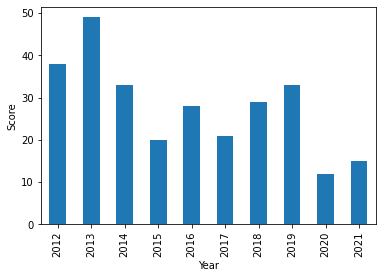

In [192]:
Brazil_score_10_year.plot(kind = "bar")
plt.ylabel('Score')
plt.xlabel('Year');